In [1]:
"""
This code explains which of the independent variables are important to compute \
dependent variable. I have taken pima-indians-diabetes.csv which I had downloaded from \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv

First step is to read the dataset and see how many input columns it has which is predictor values \ 
or feature values and output variable or response variable
"""
"""
For the model to give good result one needs to see the below points
-------------------------------------------------------------------
1.) Each independent variable must holds linear relationship with the dependent variable
2.) These independent variable should not hold linear relationship among themself else problem of multicolinearity 
    will develop
3.) Variance of error should be constant. For good results it must have zero mean and constant variance
4.) Observations must be reliable i.e each observation or row must be genuine or has real source

If a dataset follows these properties then one will get good results

"""

'\nFor the model to give good result one needs to see the below points\n-------------------------------------------------------------------\n1.) Each independent variable must holds linear relationship with the dependent variable\n2.) These independent variable should not hold linear relationship among themself else problem of multicolinearity \n    will develop\n3.) Variance of error should be constant. For good results it must have zero mean and constant variance\n4.) Observations must be reliable i.e each observation or row must be genuine or has real source\n\nIf a dataset follows these properties then one will get good results\n\n'

## Use pandas to read the csv file

In [2]:
"""
if one looks carefully at the dataset column names is not defined, names are taken \
from kaggle link \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv%5Cn%5CnFirst
"""
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [3]:
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class_name']
diabetes_csv_file = pd.read_csv('pima-indians-diabetes.csv', names=columns)

In [4]:
diabetes_csv_file.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class_name
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
"""
Input features are: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
Target column is ['class']
Aim is to find which of the input features are important for computing class
"""

"\nInput features are: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']\nTarget column is ['class']\nAim is to find which of the input features are important for computing class\n"

In [6]:
"""
to extract values based on indexing use iloc
to extract values based on labels use loc
"""
data = diabetes_csv_file.iloc[:,0:(len(columns)-1)]

In [7]:
target = diabetes_csv_file.iloc[:,len(columns)-1]

In [8]:
"""
To check which features are important for the model we will calculate
p value for each of the independent variable and if value<0.05,
we can say that such variable is significant to calculate the output
"""
ols_model = sm.OLS(target, data)

In [9]:
ols_fit = ols_model.fit()

In [10]:
ols_summary = ols_fit.summary()

In [11]:
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.487
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              90.10
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                   9.04e-105
Time:                        21:07:10   Log-Likelihood:                         -429.34
No. Observations:                 768   AIC:                                      874.7
Df Residuals:                     760   BIC:                                      911.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0247      0.005      4.536      0.000       0.014       0.035
plas           0.0039      0.001      7.701      0.000       0.003       0.005
pres          -0.0049      0.001     -6.005      0.000      -0.007      -0.003
skin        5.752e-05      0.001      0.049      0.961      -0.002       0.002
test        4.783e-05      0.000      0.304      0.761      -0.000       0.000
mass           0.0042      0.002      2.094      0.037       0.000       0.008
pedi           0.0980      0.048      2.059      0.040       0.005       0.191
age           -0.0010      0.002     -0.652      0.515      -0.004       0.002
==============================================================================
Omnibus:                      294.015   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.012
Skew:                           0.574   Prob(JB):                     4.22e-18
Kurtosis:                       1.913   Cond. No.                         575.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
"""
Some Observation while executing the above cell
Observation 1: R-squared > 0.8 for good fit but got only 0.487 and hence needs improvement
Observation 2: For any independent variable to be significiant, it must have p value < 0.05 and [skin, test, age] have value greater
               than 0.05 and hence are not significiant
"""

'\nSome Observation while executing the above cell\nObservation 1: R-squared > 0.8 for good fit but got only 0.487 and hence needs improvement\nObservation 2: For any independent variable to be significiant, it must have p value < 0.05 and [skin, test, age] have value greater\n               than 0.05 and hence are not significiant\n'

In [13]:
# modify data according to above model summary
modified_data = data.drop(['skin', 'test', 'age'], axis=1)

In [14]:
# again create OLS Model and get the summary. We need to see whether R**2 is improved or not
ols_modified_model = sm.OLS(target, modified_data)
ols_modified_fit = ols_modified_model.fit()
ols_modified_summary = ols_modified_fit.summary()

In [15]:
ols_modified_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              144.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                   8.16e-108
Time:                        21:07:10   Log-Likelihood:                         -429.66
No. Observations:                 768   AIC:                                      869.3
Df Residuals:                     763   BIC:                                      892.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0225      0.005      4.875      0.000       0.013       0.032
plas           0.0038      0.000      8.507      0.000       0.003       0.005
pres          -0.0051      0.001     -6.579      0.000      -0.007      -0.004
mass           0.0042      0.002      2.250      0.025       0.001       0.008
pedi           0.0983      0.047      2.097      0.036       0.006       0.190
==============================================================================
Omnibus:                      328.615   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.837
Skew:                           0.569   Prob(JB):                     2.80e-18
Kurtosis:                       1.891   Cond. No.                         447.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking which observation are not important using influence plot 

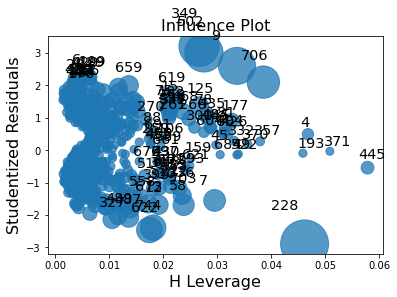

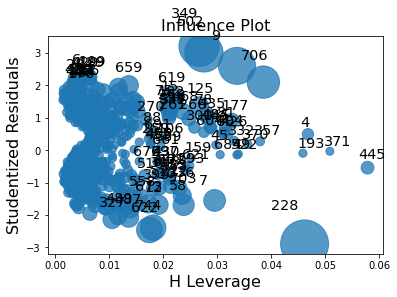

In [16]:
"""
For this one needs to plot influence from sm.graphics \
step 1: create diabetes model using target column and input features you \
        got after p-value
step 2: Draw influence_plot        
"""

diabetics_model = smf.ols('class_name ~ preg + plas + pres + mass + pedi', 
                      data=diabetes_csv_file).fit()
sm.graphics.influence_plot(diabetics_model)

In [21]:
"""
Some observation from the influence plot
Observation 1: Observation 228, 349 and 502 are going out of the plot and hence we can \
discard them
"""
modified_data_influence = modified_data.drop(modified_data.index[[228, 349, 502]], axis=0)
target_modified = target.drop(target.index[[228, 349, 502]], axis=0)

In [25]:
# again create OLS Model and get the summary. We need to see whether R**2 is improved or not
ols_modified_model_influene = sm.OLS(target_modified, modified_data_influence)
ols_modified_fit_influence = ols_modified_model_influene.fit()
ols_modified_influence_summary = ols_modified_fit_influence.summary()

In [26]:
ols_modified_influence_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              148.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                   8.06e-110
Time:                        21:28:25   Log-Likelihood:                         -420.95
No. Observations:                 765   AIC:                                      851.9
Df Residuals:                     760   BIC:                                      875.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0216      0.005      4.701      0.000       0.013       0.031
plas           0.0042      0.000      9.210      0.000       0.003       0.005
pres          -0.0053      0.001     -6.868      0.000      -0.007      -0.004
mass           0.0031      0.002      1.657      0.098      -0.001       0.007
pedi           0.1113      0.047      2.351      0.019       0.018       0.204
==============================================================================
Omnibus:                      328.852   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.405
Skew:                           0.561   Prob(JB):                     5.72e-18
Kurtosis:                       1.890   Cond. No.                         455.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""